<a href="https://colab.research.google.com/github/devshah21/MNIST_webapp/blob/main/MNIST_webapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
(x, y),(x1, y2) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


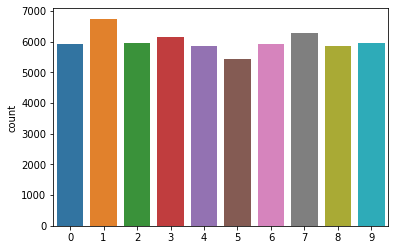

In [3]:
sns.countplot(y)

In [4]:
np.isnan(x)

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [5]:
np.isnan(x1)

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [6]:
input_shape = (28, 28, 1)

x = x.reshape(x.shape[0], *input_shape)
x = x / 255.0

x1 = x1.reshape(x1.shape[0], *input_shape)
x1 = x1 / 255.0

In [7]:
y = tf.one_hot(tf.cast(y, tf.int32), depth=10)
y2 = tf.one_hot(tf.cast(y2, tf.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], shape=(10,), dtype=float32)


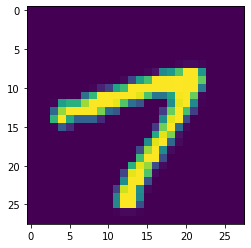

In [8]:
plt.imshow(x[101][:,:,0])
print(y[101])

In [38]:
batch_size = 64
num_classes = 10
epochs = 5

logdirs = 'logs'
callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdirs)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape= input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

In [40]:
results = model.fit(x,y, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 427s 227ms/step - loss: 0.2007 - accuracy: 0.9383
Epoch 2/5
1875/1875 [==============================] - 422s 225ms/step - loss: 0.0798 - accuracy: 0.9781
Epoch 3/5
1875/1875 [==============================] - 421s 224ms/step - loss: 0.0585 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 420s 224ms/step - loss: 0.0494 - accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 419s 223ms/step - loss: 0.0428 - accuracy: 0.9877


In [14]:
test_loss, test_acc = model.evaluate(x1, y2)

313/313 [==============================] - 16s 50ms/step - loss: 0.0255 - acc: 0.9919


In [48]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [50]:
predictions = probability_model.predict(x1)

313/313 [==============================] - 16s 50ms/step


In [45]:
img1 = x1[1]
print(img1.shape)

(28, 28, 1)


In [46]:
img1 = (np.expand_dims(img1,0))

print(img1.shape)

(1, 28, 28, 1)


In [51]:
predictions_single = probability_model.predict(img1)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[0.08533676 0.08533683 0.2319691  0.08533676 0.08533676 0.08533676
  0.08533676 0.08533676 0.08533676 0.08533676]]


In [52]:
np.argmax(predictions_single[0])

2

In [15]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 57.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.6/270.6 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [41]:
import gradio as gr

In [42]:
test=x1[0].reshape(-1,28,28)
pred=model.predict(test)

1/1 [==============================] - 0s 85ms/step


In [58]:
def predict_image(img):
    img = tf.keras.utils.normalize (img, axis=1)
    img = np.array(img).reshape(-1, 28, 28, 1)
    predictions = model.predict(img)
    return int(np.argmax(predictions))

gr.Interface(fn=predict_image, inputs="sketchpad", outputs="label").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://db1cf837-5efb-4a58.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
